# CAMI2 marine GSA dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib.patches as mpatches

In [4]:
%matplotlib inline

In [5]:
plt.rcParams.update({
    'figure.autolayout': True,
    'savefig.bbox': 'tight',
    'svg.fonttype': 'none',
    'font.sans-serif': 'Arial',
    'font.size': 11})

## Data table

In [6]:
df = pd.read_table('marine.tsv', index_col=0)
df

,Length,AvgDepth,Sample_0,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,...,PC3,DASTool_pre,DASTool_post,MaxBin_pre,MaxBin_post,MetaBAT_pre,MetaBAT_post,Truth_all,Truth_unique,Truth_strains
Contig,,,,,,,,,,,,,,,,,,,,,
PC11,2136,1.12689,0.000000,1.126890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.260037,NaN,NaN,maxbin.226,NaN,NaN,NaN,Otu2439,Otu2439,NaN
PC15,12235,2.43111,0.430699,0.000000,0.247911,0.099214,0.185685,0.086554,0.272900,0.247166,...,-0.056487,NaN,NaN,NaN,NaN,NaN,NaN,Otu965,Otu965,NaN
PC24,12446,2.79506,0.000000,0.207303,1.004150,0.682417,0.000000,0.000000,0.377521,0.243900,...,-2.562405,metabat.22_sub,metabat.22_sub.filt,maxbin.305,maxbin.305.filt,metabat.22,metabat.22.filt,Otu754,NaN,Otu754
PC42,4758,2.52539,0.422526,0.000000,0.000000,0.162543,0.585286,0.097656,0.553168,0.292318,...,0.084711,maxbin.186_sub,maxbin.186_sub.filt,maxbin.186,maxbin.186.filt,NaN,NaN,Otu2189,Otu2189,NaN
PC53,2014,3.81867,0.321888,0.482296,0.524142,0.241416,0.000000,0.482833,0.481223,0.080472,...,3.304496,NaN,NaN,maxbin.090,NaN,metabat.102,NaN,Otu761,NaN,Otu761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC1583743,7383,2.02309,0.000000,0.186230,0.351998,0.372736,0.186230,0.206415,0.202129,0.455827,...,1.157558,maxbin.289_sub,maxbin.289_sub.filt,maxbin.289,maxbin.289.filt,NaN,NaN,Otu2268,Otu2268,NaN
PC1583744,7313,2.13053,0.230071,0.000000,0.293173,0.292894,0.187770,0.000000,0.604495,0.020941,...,-0.013529,NaN,NaN,maxbin.247,NaN,NaN,NaN,Otu2333,NaN,Otu2333
PC1583762,2171,1.29095,0.296883,0.000000,0.147947,0.207818,0.000000,0.296388,0.148441,0.119248,...,-4.642395,maxbin.194_sub,NaN,maxbin.194,NaN,NaN,NaN,Otu1383,NaN,Otu1383


## Experimental groups

Binning tools

In [7]:
tools = ['DASTool', 'MaxBin', 'MetaBAT']

In [8]:
ntool = len(tools)

Curation status

In [9]:
stats = ['pre', 'post']

In [10]:
nstat = len(stats)

## Number of bins

In [11]:
cmap = plt.get_cmap('tab20c')

In [12]:
width = 0.4

In [13]:
xran = np.arange(ntool)
yran = np.arange(ntool)

In [14]:
data = [[df[f'{tool}_{stat}'].nunique() for stat in stats] for tool in tools]
data

[[351, 350], [376, 367], [286, 280]]

In [15]:
df_ = pd.DataFrame(data, columns=stats, index=tools)
df_

,pre,post
DASTool,351,350
MaxBin,376,367
MetaBAT,286,280


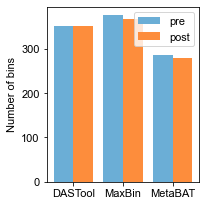

In [16]:
plt.figure(figsize=(3, 3))
for i, stat in enumerate(stats):
    plt.bar(xran + (i - 0.5) * width, df_[stat], width,
            color=cmap(i * 4 + 1), label=stat)
plt.legend()
plt.xticks(xran, tools)
plt.ylabel('Number of bins')
plt.savefig('nbin.svg')

## Number of binned contigs

In [17]:
data = [[df[f'{tool}_{stat}'].dropna().shape[0] for stat in stats] for tool in tools]
data

[[68524, 44968], [94633, 50909], [44727, 26956]]

In [18]:
df_ = pd.DataFrame(data, columns=stats, index=tools) / 1000
df_

,pre,post
DASTool,68.524,44.968
MaxBin,94.633,50.909
MetaBAT,44.727,26.956


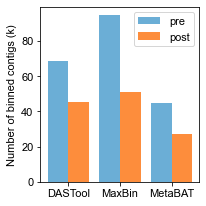

In [19]:
plt.figure(figsize=(3, 3))
for i, stat in enumerate(stats):
    plt.bar(xran + (i - 0.5) * width, df_[stat], width,
            color=cmap(i * 4 + 1), label=stat)
plt.legend()
plt.xticks(xran, tools)
plt.ylabel('Number of binned contigs (k)')
plt.savefig('nctg.svg')

## Length of binned contigs

In [20]:
data = [[df.dropna(subset=[f'{tool}_{stat}'])['Length'].sum() for stat in stats] for tool in tools]
data

[[1188333418, 1086433598], [1180809672, 965755368], [1149868978, 901960737]]

In [21]:
df_ = pd.DataFrame(data, columns=stats, index=tools) / 1000000000
df_

,pre,post
DASTool,1.188333,1.086434
MaxBin,1.180810,0.965755
MetaBAT,1.149869,0.901961


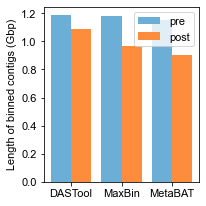

In [22]:
plt.figure(figsize=(3, 3))
for i, stat in enumerate(stats):
    plt.bar(xran + (i - 0.5) * width, df_[stat], width,
            color=cmap(i * 4 + 1),label=stat)
plt.legend()
plt.xticks(xran, tools)
plt.ylabel('Length of binned contigs (Gbp)')
plt.savefig('blen.svg')

## CheckM bin quality

In [23]:
dfc = pd.read_table('checkm.tsv')
dfc.head()

,Binner,Curation,Bin Id,Marker lineage,# genomes,# markers,# marker sets,Completeness,Contamination,Strain heterogeneity,...,GC std (scaffolds > 1kbp),Coding density,Translation table,# predicted genes,0,1,2,3,4,5+
0,DASTool,pre,metabat.10,o__Rhizobiales (UID3447),356,416,249,97.79,0.64,0.00,...,0.00,88.95,11,3293,6,405,5,0,0,0
1,DASTool,pre,metabat.103_sub,f__Rhodobacteraceae (UID3375),32,625,283,98.12,4.88,31.82,...,2.04,86.62,11,4585,12,591,22,0,0,0
2,DASTool,pre,metabat.104,k__Bacteria (UID203),5449,104,58,17.08,0.00,0.00,...,3.88,89.76,11,566,84,20,0,0,0,0
3,DASTool,pre,metabat.107_sub,g__Staphylococcus (UID294),60,773,178,97.96,3.32,96.43,...,1.60,86.88,11,2399,13,732,28,0,0,0
4,DASTool,pre,metabat.109,k__Bacteria (UID2142),169,316,236,98.73,0.00,0.00,...,0.00,92.98,11,2264,3,313,0,0,0,0


In [24]:
res = []
for tool in tools:
    for stat in stats:
        df_ = dfc.query(f'Binner == "{tool}" and Curation == "{stat}"')
        high = df_.query('Completeness >= 90 and Contamination < 5').shape[0]
        medium = df_.query('Completeness >= 50 and Contamination < 10').shape[0] - high
        low = df_.query('Completeness < 50 and Contamination < 10').shape[0]
        res.append([tool, stat, high, medium, low])
df_ = pd.DataFrame(res, columns=['Binner', 'Curation', 'High', 'Medium', 'Low'])
df_

,Binner,Curation,High,Medium,Low
0,DASTool,pre,198,72,28
1,DASTool,post,224,74,43
2,MaxBin,pre,158,62,62
3,MaxBin,post,182,76,96
4,MetaBAT,pre,136,29,64
5,MetaBAT,post,159,33,68


In [25]:
quals = ['High', 'Medium', 'Low']

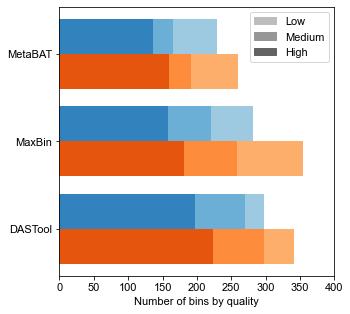

In [26]:
plt.figure(figsize=(5, 4.5))
for i, stat in enumerate(stats):
    yran_ = yran + (0.5 - i) * width
    left = np.zeros(ntool)
    for j, qual in enumerate(quals):
        vals = df_.query(f'Curation=="{stat}"')[qual]
        plt.barh(yran_, vals, width, left=left, color=cmap(i * 4 + j), label=stat)
        left += vals
plt.legend(handles=[mpatches.Patch(color=cmap(
    16 + i), label=qual) for i, qual in enumerate(quals)][::-1])
plt.xlim(right=400)
plt.yticks(yran, tools)
plt.xlabel('Number of bins by quality')
plt.savefig('checkm.svg')

## Adjusted Rand Index

In [27]:
dfa = pd.read_table('ari.tsv', names=['left', 'right', 'ari'])
dfa.head()

,left,right,ari
0,DASTool_pre,DASTool_post,1.00000
1,DASTool_pre,MaxBin_pre,0.97282
2,DASTool_pre,MaxBin_post,0.98875
3,DASTool_pre,MetaBAT_pre,0.93960
4,DASTool_pre,MetaBAT_post,0.98016


Before vs after

In [28]:
truth = 'Truth_all'

In [29]:
data = []
dfa_ = dfa.query(f'right=="{truth}"')
for tool in tools:
    data.append([])
    for stat in stats:
        data[-1].append(dfa_.query(f'left=="{tool}_{stat}"').iloc[0]['ari'])

In [30]:
df_ = pd.DataFrame(data, columns=stats, index=tools)
df_

,pre,post
DASTool,0.72872,0.98282
MaxBin,0.58581,0.94558
MetaBAT,0.54131,0.73472


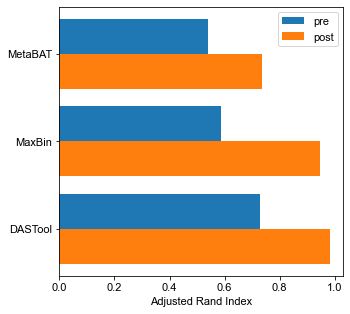

In [31]:
plt.figure(figsize=(5, 4.5))
for i, stat in enumerate(stats):
    plt.barh(yran + (0.5 - i) * width, df_[stat], width, label=stat)
plt.legend()
plt.yticks(yran, tools)
plt.xlabel('Adjusted Rand Index')
plt.savefig('ari.svg')